In [72]:
import xgboost
import numpy as np
import shap

# train XGBoost model
X, y = shap.datasets.adult()
model = xgboost.XGBClassifier().fit(X, y)


 99%|===================| 32301/32561 [01:19<00:00]        

In [126]:
list(X[0:1])

['Age',
 'Workclass',
 'Education-Num',
 'Marital Status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital Gain',
 'Capital Loss',
 'Hours per week',
 'Country']

In [127]:
input_data = np.array([[
    39.0,7,13.0,4,1,0,4,1,2174.0,0.0,40.0,39
]])

features = list(X[0:1])

In [123]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(input_data)

In [128]:
import matplotlib as plt

shap_plot = shap.force_plot(explainer.expected_value,shap_values[0], features, matplotlib = True, show = False)
shap_plot.savefig('tmp.png')



## =================================================
REAL DATA
## =================================================


In [135]:
import xgboost as xgb
bst = xgb.XGBClassifier()
bst.load_model("./model/xg_SHAP.json")

input_data = np.array([[
    0.8, 6.5, 10.8, 16, 12, 46, 55, 37, 32
]])

features = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']

In [136]:
explainer = shap.TreeExplainer(bst)
shap_values = explainer.shap_values(input_data)


In [137]:
import matplotlib as plt

shap_plot = shap.force_plot(explainer.expected_value,shap_values[0], features, matplotlib = True, show = False)
shap_plot.savefig('tmp1.png')


## =========================================
End Real Data
## =========================================

In [114]:
bst = xgboost.Booster()
bst.load_model('./model/xgboost_classifier_model.json')
input_data = np.array([1,1,1,1],dtype=np.float16).reshape(1,-1)

In [112]:
dmatrix = xgboost.DMatrix(input_data)

# Use the loaded model to get Shapley values
explainer = shap.Explainer(bst)
shap_values = explainer.shap_values(input_data)
shap_values[0]

ValueError: This reshape error is often caused by passing a bad data matrix to SHAP. See https://github.com/shap/shap/issues/580.

In [37]:
from matplotlib.pyplot import plot as plt

In [38]:

# Create a shapely waterfall plot
# input_data = input_data.astype(np.float64)
# explainer = shap.Explainer(model, inpSut_data)
# shap_values = explainer(input_data)

# Plot the waterfall chart
shap.waterfall_plot(shap_values[0])
plt.title("SHAP Values Waterfall Plot")
plt.xlabel("SHAP Value")
plt.tight_layout()
plt.show()

TypeError: The waterfall plot requires an `Explanation` object as the `shap_values` argument.

In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [70]:


from src.core import LVCPredictor

LVCP = LVCPredictor(model_name="xg_SHAP.json")


In [71]:
pred, plot = LVCP.predict(0.8, 6.5, 10.8, 16, 12, 46, 55, 37, 32)
plot.show()


Input data:  [[ 0.8  6.5 10.8 16.  12.  46.  55.  37.  32. ]]
Expected value:  <shap.explainers._tree.TreeExplainer object at 0x179816c90>
Expected value:  1.0604902617633343


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

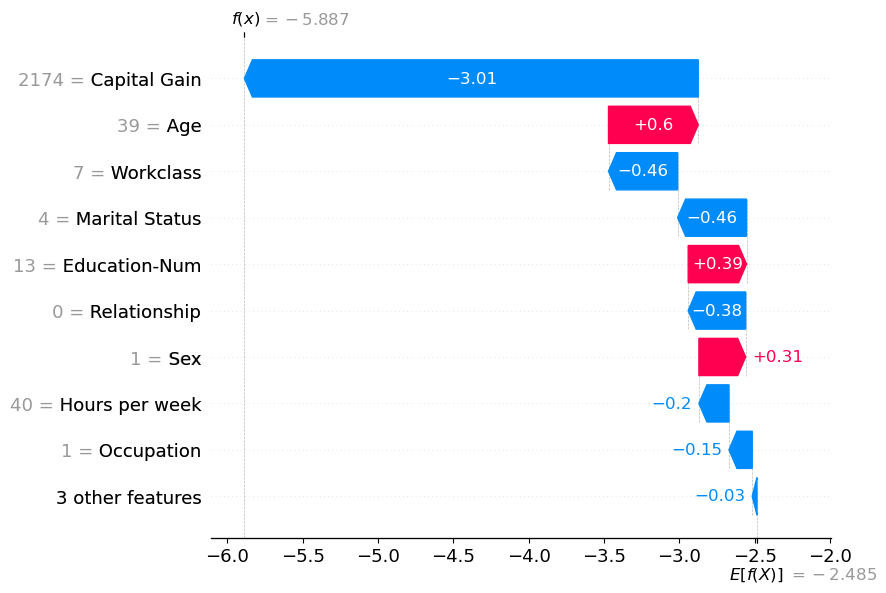

AttributeError: 'function' object has no attribute 'title'

In [12]:
from matplotlib.pyplot import plot as plt
shap.waterfall_plot(shap_values[0])
plt.title("SHAP Values Waterfall Plot")
plt.xlabel("SHAP Value")
plt.tight_layout()
plt.show()
